![Kickstarter](kickstarter_logo.png)

# Analysis of Data from Kickstarter Projects
### Data taken from Kaggle (https://www.kaggle.com/kemical/kickstarter-projects)

# Zielfragestellung: Gibt es Trends in den Erfolgen von Projekten? Sind manche Kategorien erfolgreicher als andere, und wenn ja wieso?

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

filename = 'data/ks-projects-201801.csv'
df = pd.read_csv(filename)

In [2]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


The first look at the data shows that there are some interesting questions one can ask about the Projects of Kickstarter. <br>
Some possible questions are:
> What (main) category is typically the most successful? <br>
What are people willing to pledge for different categories? <br>
Is there a threshold for the money, at which most projects fail? <br>
Is it possible to predict the success ratio based on the other values? <br>
What countries do have the most successful projects? What country do the most backers come from? <br>
What impact does the deadline have on the backers and on the state? Do people tend to pledge more if the deadline is near or far? <br>

I'm going to take a closer look at the following questions:
> What (main) category is typically the most successful? <br>
What are people willing to pledge (avg, median, mode) for different categories? <br>
What impact does the deadline have on the backers and on the state? Do people tend to pledge more if the deadline is near or far? <br>

In [3]:
# remove columns which aren't used during analysis
df.drop(['usd pledged', 'usd_pledged_real', 'usd_goal_real'], axis=1, inplace=True)

# convert launched and deadline columns
from datetime import datetime
df['launched'] = df['launched'].apply(lambda x: datetime.strptime(x[:10], "%Y-%m-%d"))
df['deadline'] = df['deadline'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))
df['year_deadline'] = df['deadline'].apply(lambda x: x.year)
df['project_runtime'] = df['deadline'] - df['launched']
df['project_runtime'] = df['project_runtime'].apply(lambda x: int(x.days)) # project runtime in days

# calculate difference between money goal and real pledge
df['diff_goal_pledged'] = df['pledged'] - df['goal']

In [4]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,year_deadline,project_runtime,diff_goal_pledged
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11,0.0,failed,0,GB,2015,59,-1000.0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02,2421.0,failed,15,US,2017,60,-27579.0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12,220.0,failed,3,US,2013,45,-44780.0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17,1.0,failed,1,US,2012,30,-4999.0
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04,1283.0,canceled,14,US,2015,56,-18217.0


### What (main) category is typically the most successful? Are there categories which are more likely to succeed / fail?

In [6]:
overall_states = df['state'].value_counts(normalize=True)

In [7]:
from collections import defaultdict
group_cat_to_state = df.groupby(['main_category'])['state'].value_counts(normalize=True)
cat_state_dict = defaultdict(dict)
for idx, value in enumerate(group_cat_to_state):
    cat, state = group_cat_to_state.index[idx]
    cat_state_dict[cat][state] = value # example: Art & Failed -> 14039

In [8]:
X = []
Y = []
Annotations = []
for cat, state_value_dict in cat_state_dict.items():
    for state, value in state_value_dict.items():
        X.append(state)
        Y.append(value)
        Annotations.append(cat)
        #print(cat, state, value)

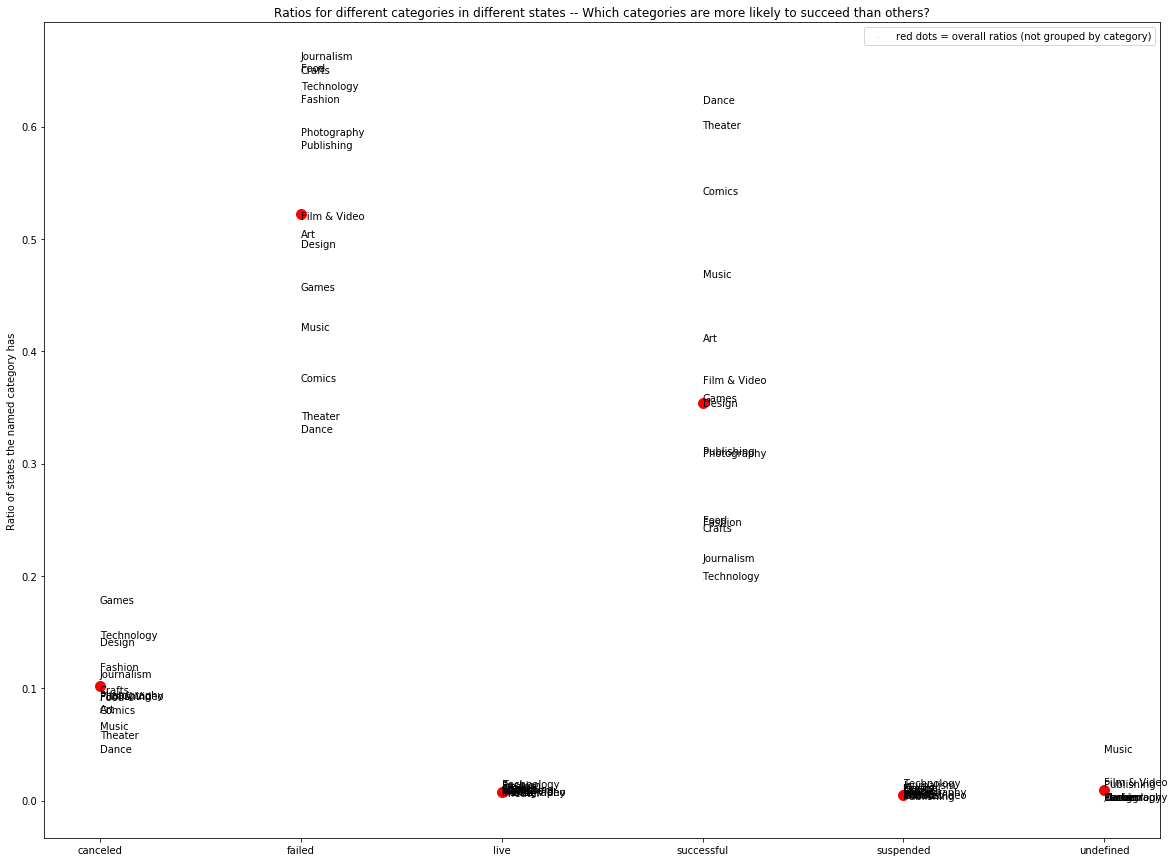

In [9]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 15)
ax.scatter(x=X, y=Y, s=0.01) # data point is too small to see (-> show only text)
for i, txt in enumerate(Annotations):
    ax.annotate(txt, (X[i], Y[i])) # places the text annotation at the data point
ax.scatter(x=list(overall_states.index), y=list(overall_states.values), s=100, c='r') # overall states ratio
plt.ylabel("Ratio of states the named category has")
plt.title("Ratios for different categories in different states -- Which categories are more likely to succeed than others?")
plt.legend(["red dots = overall ratios (not grouped by category)"])
plt.show()

In [10]:
successful_cats = ['Dance', 'Theater', 'Comics', 'Music', 'Art']
failed_cats = ['Journalism', 'Food', 'Crafts', 'Technology', 'Fashion', 'Photography', 'Publishing']
canceled_cats = ['Games', 'Technology', 'Design', 'Fashion', 'Journalism']
unsuccessful_cats = list(set().union(failed_cats, canceled_cats)) # merges failed and canceled cats

In [11]:
success_df = df.loc[df['main_category'].isin(successful_cats)]
nosuccess_df = df.loc[df['main_category'].isin(unsuccessful_cats)]

### Is there a threshold for the money, at which most projects fail?

In [12]:
df.groupby(['state'])['goal'].mean()

state
canceled       86193.059649
failed         67346.845539
live           76762.393355
successful     10162.960544
suspended     181370.796858
undefined       4405.393599
Name: goal, dtype: float64

In [13]:
df.groupby(['main_category','state'])['goal'].mean().loc[successful_cats].groupby(['state']).mean()

state
canceled      44872.203435
failed        42123.175920
live          21967.139569
successful     5307.162505
suspended     27690.298033
undefined     23074.483438
Name: goal, dtype: float64

In [14]:
df.groupby(['main_category','state'])['goal'].mean().loc[unsuccessful_cats].groupby(['state']).mean()

state
canceled       65357.258696
failed         55498.234528
live           33913.073091
successful     12291.052442
suspended     437524.795052
undefined      17819.742424
Name: goal, dtype: float64

Generell sind erfolgreiche Projekte günstiger als unerfolgreiche

### Can the insights be combined?
-> Projekte, die zu den erfolgreichen gehören, haben z.B. generell ein geringeres Preisziel oder ähnliches

### Did the project goals change through time?

In [15]:
df.sort_values(by='deadline', inplace=True)

In [16]:
def moving_avg(df, col, k):
    averages = []
    for idx, row in enumerate(df[col]):
        if idx < k:
            averages.append(round(df[col].iloc[0:idx+1].mean()))
        else:
            #idx = 10
            # k = 3
            # -> 8, 9, 10
            averages.append(round(df[col].iloc[idx - k:idx].mean()))
    #df.sort_index()
    return averages

In [17]:
k = 10000 # value, at which the curves get smoother
moving_avgs = {}
deadlines = {}
for cat in (successful_cats + unsuccessful_cats):
    moving_avgs[cat] = moving_avg(df.loc[df['main_category'] == cat], 'goal', k)
    deadlines[cat] = df['deadline'].loc[df['main_category'] == cat]

In [18]:
def plot_change_in_goalsize(moving_avgs, deadlines, col):
    fig, ax = plt.subplots()
    fig.set_size_inches(20, 14)
    if col in successful_cats:
        c = 'b'
    elif col in unsuccessful_cats:
        c = 'r'
    else:
        c = 'k'
    ax.plot(deadlines[col], moving_avgs[col], c=c)
    left, right = plt.xlim()
    left += 158.15
    right -= 2 * 158.15
    plt.xticks(np.linspace(left, right, 9), ['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'], rotation=90)
    plt.title("Changing goal size through the years")
    plt.show()

In [19]:
def plot_stats_per_year(df, col):
    years = []
    states = []
    values = []
    df_states_in_tech_per_year = df.groupby(['main_category', 'year_deadline'])['state'].value_counts(normalize=True).loc[col]
    for idx in range(len(df_states_in_tech_per_year)):
        state = df_states_in_tech_per_year.index[idx][1]
        if state in ['successful', 'canceled', 'failed']:
            years.append(df_states_in_tech_per_year.index[idx][0])
            states.append(state)
            values.append(df_states_in_tech_per_year.values[idx])
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 7)
    for i, txt in enumerate(years):
        ax.annotate(txt, (states[i], values[i]))
    ax.scatter(states, values, s=0.01)
    plt.title("Stats for Category '{}'".format(col))
    plt.show()

# Vergleich von zwei Kategorien (erfolgreich vs. unerfolgreich)

Verlauf der Goal-Size

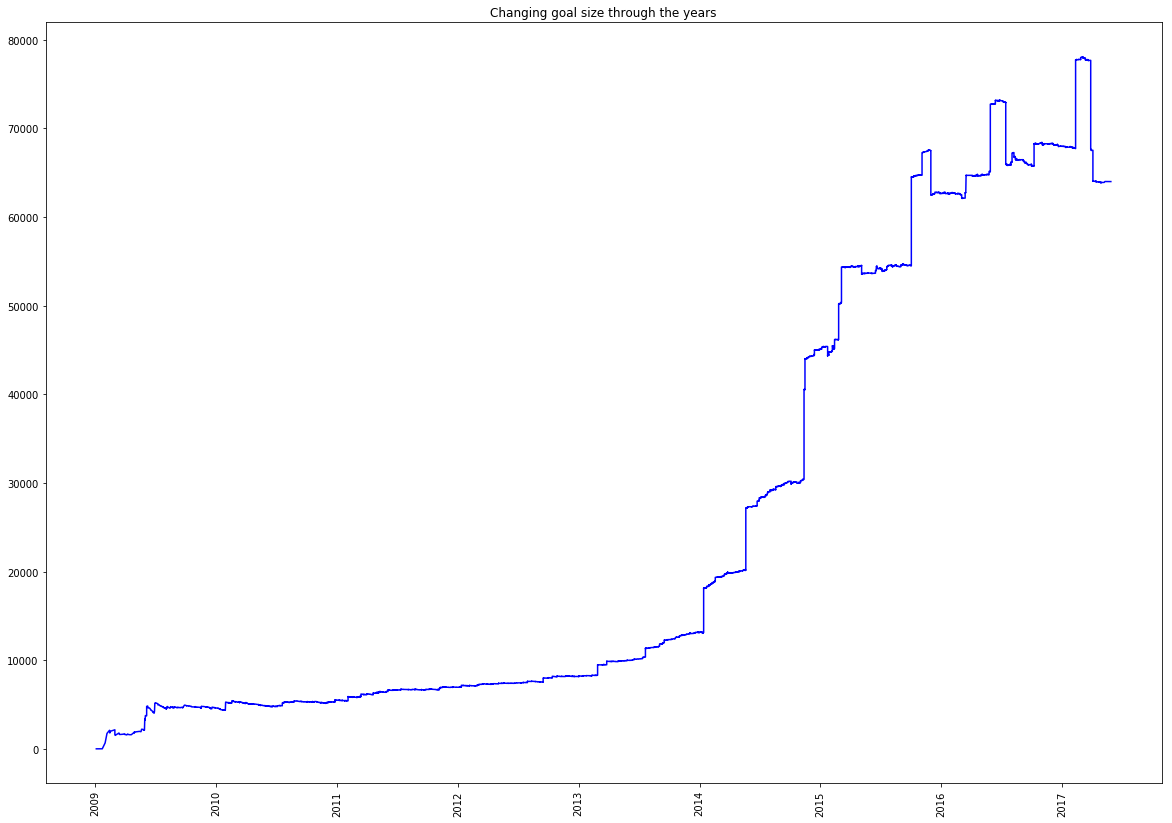

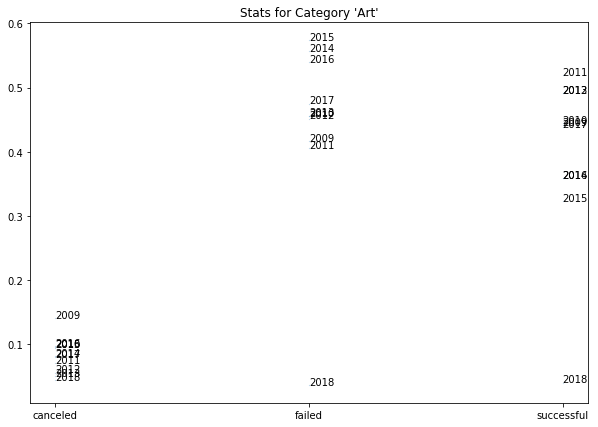

In [20]:
success_cat = 'Art'
plot_change_in_goalsize(moving_avgs, deadlines, success_cat)
plot_stats_per_year(df, success_cat)

### since 2014, the projects aren't as successful anymore as they used to be - projects got much more expensive since then (up to 80,000USD)
-> Projects should have a goal size of roughly 20,000USD

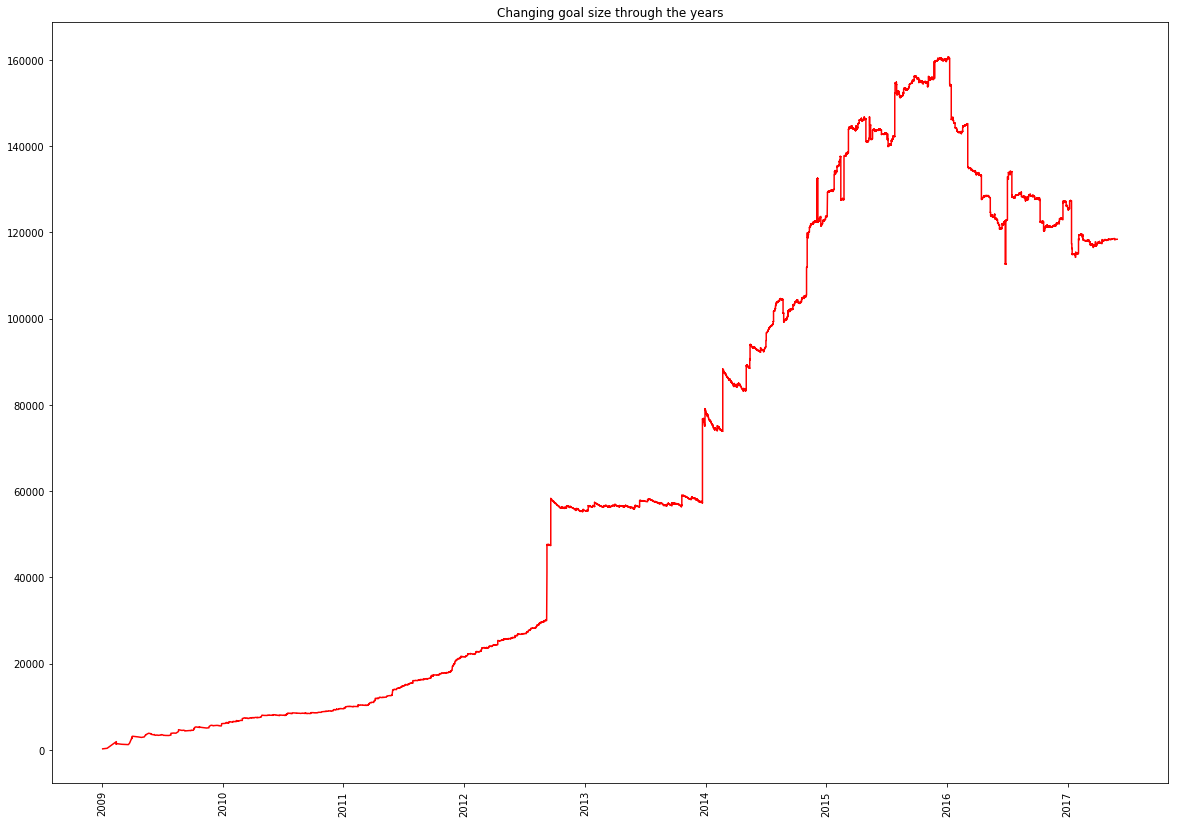

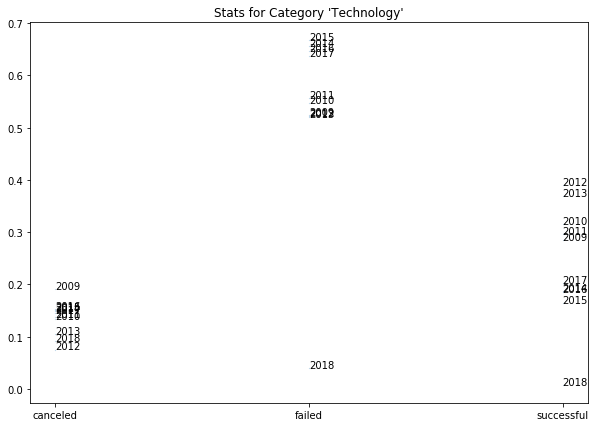

In [21]:
failed_cat = 'Technology'
plot_change_in_goalsize(moving_avgs, deadlines, failed_cat)
plot_stats_per_year(df, failed_cat)

-> am Graphen von Technology lässt sich sehr gut erkennen, dass ab dem Anstieg der durchschnittlichen Kosten-ziele ab 2014 weniger Projekte erfolgreich durchgeführt wurden! <br>
-> auch bei Art sieht man seit 2015 ein Sinken der Erfolgsrate, aber nicht in dem gleichen Maße

# BIS HIERHIN KANN DIE ANALYSE 1:1 ÜBERNOMMEN WERDEN (NACH REFACTORING)

In [39]:
art_df = df.loc[df['main_category'] == 'Art'] # Dive deeper into the Art category
tech_df = df.loc[df['main_category'] == 'Technology'] # Dive deeper into the Tech category

In [34]:
from collections import defaultdict
group_cat_to_state = art_df.groupby(['category'])['state'].value_counts(normalize=True)
cat_state_dict = defaultdict(dict)
for idx, value in enumerate(group_cat_to_state):
    cat, state = group_cat_to_state.index[idx]
    cat_state_dict[cat][state] = value # example: Art & Failed -> 14039

In [35]:
X = []
Y = []
Annotations = []
for cat, state_value_dict in cat_state_dict.items():
    for state, value in state_value_dict.items():
        X.append(state)
        Y.append(value)
        Annotations.append(cat)
        #print(cat, state, value)

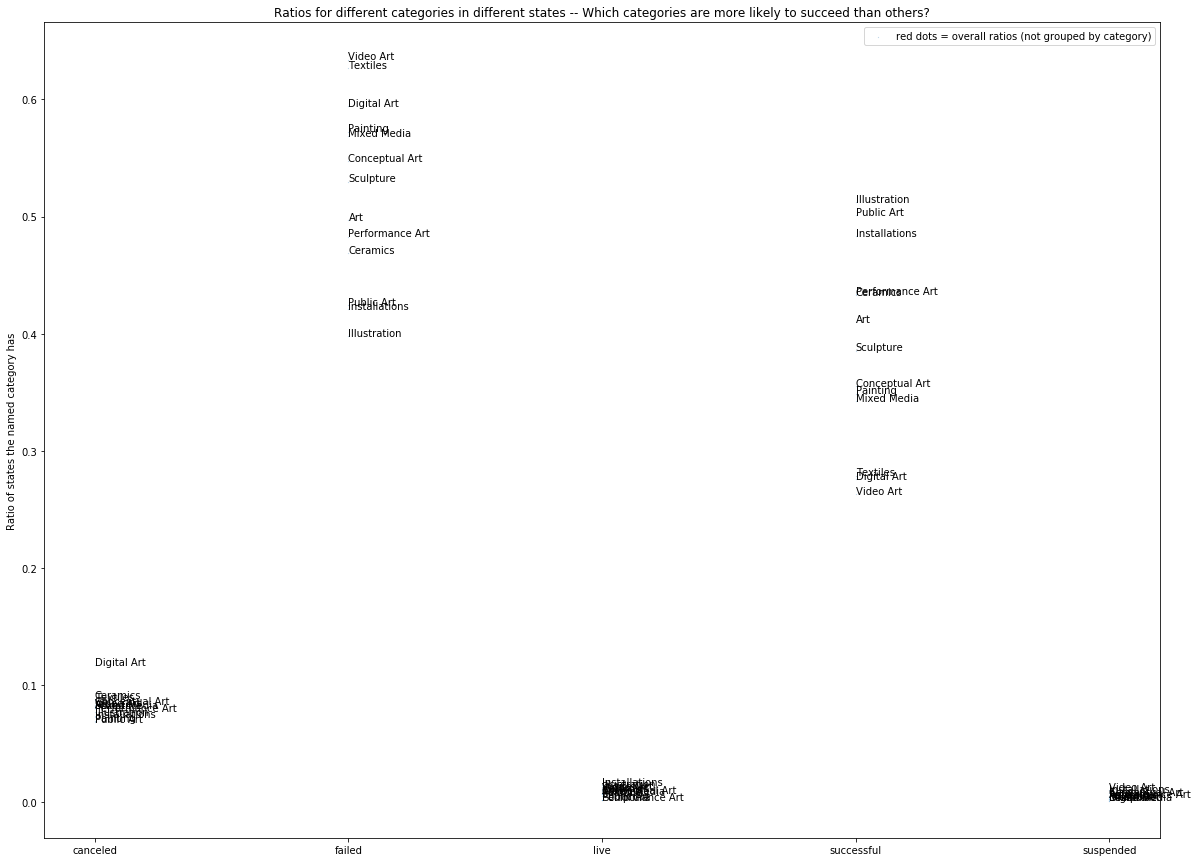

In [38]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 15)
ax.scatter(x=X, y=Y, s=0.01) # data point is too small to see (-> show only text)
for i, txt in enumerate(Annotations):
    ax.annotate(txt, (X[i], Y[i])) # places the text annotation at the data point
#ax.scatter(x=list(overall_states.index), y=list(overall_states.values), s=100, c='r') # overall states ratio
plt.ylabel("Ratio of states the named category has")
plt.title("Ratios for different categories in different states -- Which categories are more likely to succeed than others?")
plt.legend(["red dots = overall ratios (not grouped by category)"])
plt.show()

In [41]:
from collections import defaultdict
group_cat_to_state = tech_df.groupby(['category'])['state'].value_counts(normalize=True)
cat_state_dict = defaultdict(dict)
for idx, value in enumerate(group_cat_to_state):
    cat, state = group_cat_to_state.index[idx]
    cat_state_dict[cat][state] = value # example: Art & Failed -> 14039

In [42]:
X = []
Y = []
Annotations = []
for cat, state_value_dict in cat_state_dict.items():
    for state, value in state_value_dict.items():
        X.append(state)
        Y.append(value)
        Annotations.append(cat)
        #print(cat, state, value)

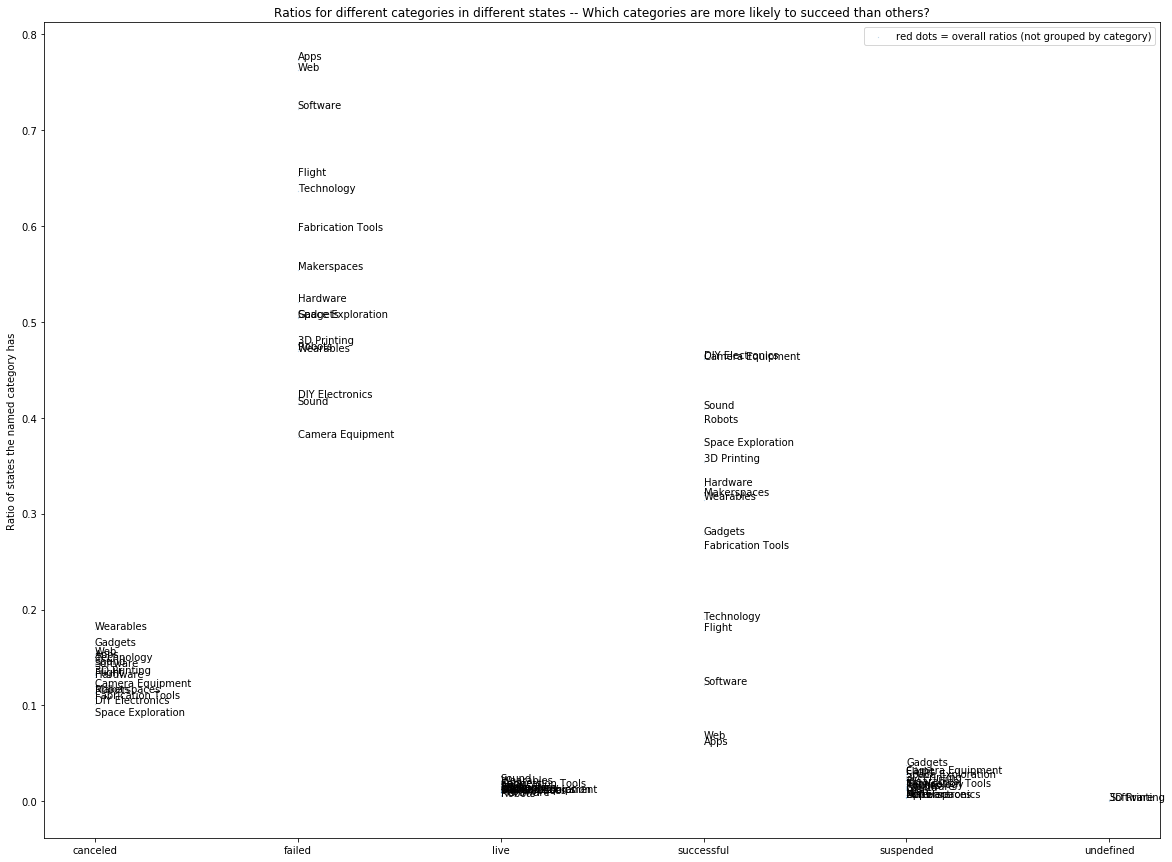

In [43]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 15)
ax.scatter(x=X, y=Y, s=0.01) # data point is too small to see (-> show only text)
for i, txt in enumerate(Annotations):
    ax.annotate(txt, (X[i], Y[i])) # places the text annotation at the data point
#ax.scatter(x=list(overall_states.index), y=list(overall_states.values), s=100, c='r') # overall states ratio
plt.ylabel("Ratio of states the named category has")
plt.title("Ratios for different categories in different states -- Which categories are more likely to succeed than others?")
plt.legend(["red dots = overall ratios (not grouped by category)"])
plt.show()

# TESTING

### DURCHSCHNITTLICHE LAUFZEIT JE KATEGORIE (deadline - launched)

In [59]:
df.groupby(['main_category','year_deadline'])['project_runtime'].mean()

main_category  year_deadline
Art            2009             54.070866
               2010             63.133676
               2011             38.295648
               2012             32.539838
               2013             30.938105
               2014             31.599880
               2015             32.088752
               2016             32.323651
               2017             30.025932
               2018             35.954751
Comics         2009             69.750000
               2010             53.134783
               2011             44.314433
               2012             35.626422
               2013             33.511461
               2014             33.146590
               2015             33.675169
               2016             32.326574
               2017             31.088132
               2018             39.032967
Crafts         2009             52.571429
               2010             47.148148
               2011             36.765766
     